[Accueil](../../../index.ipynb) > [Sommaire de Terminale](../../index.ipynb)

# Structure de données - Graphes

![](Social_Network_Analysis_Visualization.png)

## Différents types de structures

Nous avons manipulé des **structures linéaires** comme les [listes](../List/List.ipynb), les [piles ou files](../Pile_et_File/Pile_et_File.ipynb). Ces structures sont à **une dimension**, on les parcours du début à la fin en suivant un unique chemin.

Les [arbres](../Arbre/arbre.ipynb) sont des **structures non linéaires** utilisés pour représenter une **hiérarchie** (Arbre généalogique, Structure de dossiers...)

Dans ce chapitre nous allons étudier les **graphes** qui sont également des **structures non linéaires**.

## Définitions

Un graphe est une structure composée d'**objets** dans laquelle certaines paires d'objets sont en **relation**.

Les objets sont appelés **sommets** (ou noeuds) et les relations entre sommets sont des **arêtes**.

Mathématiquement, un graphe est un couple $G=(V,E)$ comprenant:
- V : un ensemble de sommets (*vertices* ou *nodes* en anglais)
- E : un ensemble d'arêtes (*edges* en anglais) qui sont des paires de sommets.

**Remarque**

Un **arbre** est un **graphe particulier** : tous ses noeuds, sauf la racine, ont un unique parent. 
Un arbre est un graphe sans cycle, c'est à dire que partant de n'importe quel noeud, il n'existe aucun chemin qui rejoigne ce noeud.

De même,  une **liste** est un **arbre particulier** : chaque noeud, sauf le dernier, a un unique enfant.

Il n'existe aucune restriction de parenté ou de paternité dans un graphe:
- Chaque noeud peut avoir plusieurs successeurs;
- Chaque noeud peut avoir plusieurs prédecesseurs.

**Conséquence** : il n'existe pas de racine dans un graphe.

<div class = "alert alert-info">
    
Nous n'étudierons que des graphes **simples** c'est à dire des graphes ne comportant ni boucle ni arêtes multiples.
</div>

## Graphe orienté ou non orienté

### Graphe orienté (*directionnal graph*)

- Un graphe est **orienté** si ses arêtes ne peuvent être parcourues que dans **un sens**. L'orientation des arêtes est indiquée par des flèches. Une **arête orientée** s'appelle aussi un **arc**.
- Un **chemin** est une succession d'arcs telle que l'extremité de chacun est l'origine du suivant. Le nombre d'arcs qui composent un chemin est la **longueur du chemin**.
- Un **chemin fermé** est un chemin dont l'origine et l'extrémité sont identique.
- Un **circuit** est un chemin fermé dont les arcs sont distincs.

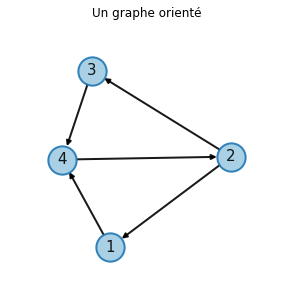

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

options = {
    "font_size": 15,
    "node_size": 800,
    "node_color": "#A0CBE2",
    "edgecolors": "tab:blue",
    "alpha": 0.9,
    "linewidths": 2,
    "width": 2,
}

G = nx.DiGraph()
G.add_edges_from([(1,4), (2,1), (2,3), (4,2), (3,4)])

plt.figure(figsize=(5,5))
ax = plt.gca()
ax.margins(0.20)
ax.set_title('Un graphe orienté')

nx.draw(G, with_labels = True, **options)

Dans le graphe orienté ci-dessus:

- (1,4), (4, 2), (2, 3) est un **chemin** de longueur 3.
- (1,4), **(4,2)**, (2,3), (3,4), **(4,2)**, (2,1) est un **chemin fermé**. 
- (1,4), (4,2), (2,1) est un **circuit**.

**Applications**:

- Un réseau routier (sens uniques)
- Un réseau social (follower)
- ...

**Exercice**

Modèliser par un graphe orienté le réseau de rues ci-dessous

![](graphe_rue.png)

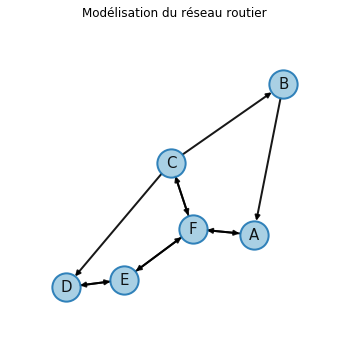

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
G.add_node("A")
G.add_node("B")
G.add_node("C")
G.add_node("D")
G.add_node("E")
G.add_node("F")
G.add_edge("A", "F")
G.add_edge("B", "A")
G.add_edge("C", "B")
G.add_edge("C", "D")
G.add_edge("C", "F")
G.add_edge("D", "E")
G.add_edge("E", "D")
G.add_edge("E", "F")
G.add_edge("F", "E")
G.add_edge("F", "C")
G.add_edge("F", "A")

plt.figure(figsize=(6,6))
plt.axis("off")
ax = plt.gca()
ax.set_title('Modélisation du réseau routier')
ax.margins(0.20)

nx.draw_networkx(G, with_labels = True, ax=ax, **options)

### Graphe non orienté

- Un graphe est **non orienté** si ses arêtes sont bidirectionnels. Dans un graphe non orienté il n'existe pas de boucle.
- Les arètes d'un graphe non orienté se représentent par des liaisons non fléchées.
- On appelle **chaîne** une suite d'arêtes consécutives reliant deux sommets.
- La **longueur d'une chaîne** est le nombre d'arêtes qui la composent.
- Une **chaîne fermée** est une chaîne dont l'origine de la première arête et l'extrémité de la dernière arête sont confondues.
- Un **cycle** est une **chaîne fermée** dont les arêtes sont **distinctes**.

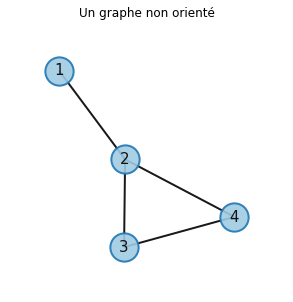

In [223]:
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (2,4), (3,4)])

plt.figure(figsize=(5,5))
ax = plt.gca()
ax.margins(0.20)
ax.set_title('Un graphe non orienté')

nx.draw(G, with_labels = True, ax=ax, **options)

| Graphe non-orienté | Graphe orienté |
|--------------------|----------------|
| arête              |  arc           |
| chaîne             |  chemin        |
| cycle              |  circuit       |

## Graphe pondéré

Un **graphe pondéré** est un graphe (orienté ou non) dont les arêtes sont affectées d'un nombre.


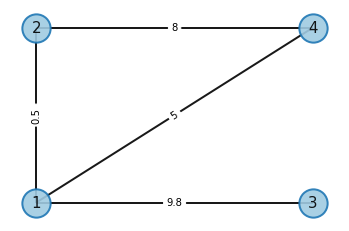

In [241]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_node(1,pos=(0,0))
G.add_node(2,pos=(0,1))
G.add_node(3,pos=(1,0))
G.add_node(4,pos=(1,1))
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=9.8)
G.add_edge(1,4,weight=5)
G.add_edge(2,4,weight=8)
pos=nx.get_node_attributes(G,'pos')
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(G,pos, with_labels = True, **options)

**Applications**

- Réseau routier (distance ou durée)
- Réseau informatique (débit)

## Connexité d'un graphe

- Un graphe **non orienté** est **connexe** si pour toute paire de sommets (x, y) il existe une chaîne de x à y. 

- Un graphe **orienté** est **de faible connexité** si en oubliant l'orientation des arêtes, le graphe est connexe.

- Un graphe **orienté** est **de forte connexité** si pour toute paire de sommets (x, y) il existe un chemin de x à y


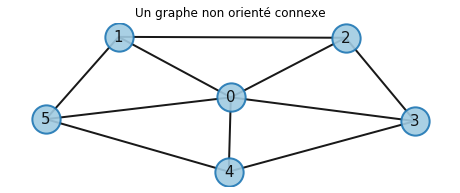

In [226]:
import matplotlib.pyplot as plt
import networkx as nx
plt.figure(figsize=(8,3))
ax = plt.gca()
ax.set_title('Un graphe non orienté connexe')
G = nx.wheel_graph(6)
nx.draw(G, with_labels = True, ax=ax, **options)

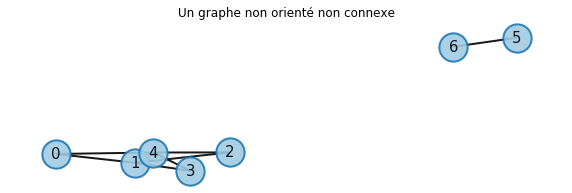

In [231]:
plt.figure(figsize=(10,3))
ax = plt.gca()
ax.set_title('Un graphe non orienté non connexe')
G = nx.Graph()
G.add_nodes_from(range(7))
G.add_edges_from([(0,1),(3,4),(4,2),(1,3),(4,0),(1,2),(5,6)])
nx.draw(G, with_labels = True, **options)


Remarque : 

- Le **réseau routier** mondial peut être modélisé par un graphe **non connexe**.
- Un **réseau d'amitié** peut être modélisé par un graphe **non connexe**.


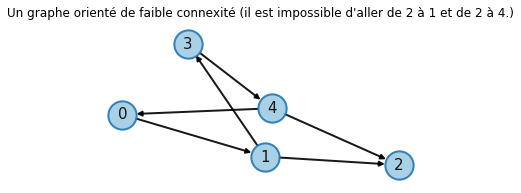

In [232]:
plt.figure(figsize=(6,3))
ax = plt.gca()
ax.set_title("Un graphe orienté de faible connexité (il est impossible d'aller de 2 à 1 et de 2 à 4.)")
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0,1),(3,4),(4,2),(1,3),(4,0),(1,2)])
nx.draw(G, with_labels = True, **options)


## Représentatation des graphes

### Représentation par listes d'adjacence

On peut considérer un graphe comme une liste de sommets et pour chaque sommet on associe la liste des sommets liés.

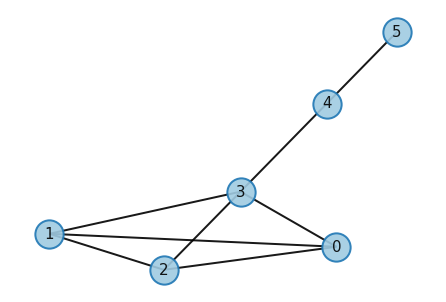

In [233]:
G = nx.lollipop_graph(4, 2)
nx.draw(G, with_labels = True, **options)

La liste d'**adjacence des successeurs** de ce graphe peut être réprésentée par :

In [168]:
result = []
for node in G.nodes():
    neighbors = [n for n in G.neighbors(node)]
    print(f"{node} -> {neighbors}")

0 -> [1, 2, 3]
1 -> [0, 2, 3]
2 -> [0, 1, 3]
3 -> [0, 1, 2, 4]
4 -> [5, 3]
5 -> [4, 6]
6 -> [5]


#### Implémentation en Python

Une implémentation en Python peut être un **dictionnaire** dont les **clés** sont les **sommets** du graphe et les **valeurs** une **liste** de sommets:

In [177]:
T = {
    0:[1,2,3],
    1:[0,2,3],
    2:[0,1,3],
    3:[0,1,2,4],
    4:[5,3],
    5:[4,6],
    6:[5],
}

Une meilleure possibilité est de choisir un **dictionnaire** dont les **clés** sont les **sommets** du graphe et les valeurs un **[ensemble](https://docs.python.org/fr/3/tutorial/datastructures.html#sets)** (type set) des sommets.

In [ ]:
T = {
    0:{1,2,3},
    1:{0,2,3},
    2:{0,1,3},
    3:{0,1,2,4},
    4:{5,3},
    5:{4,6},
    6:{5},
}

<div class="alert alert-info">

Cette représentation est adaptée aux graphes **peu denses** (qui possèdent peu d'arêtes).
</div>

**Opérations sur les listes d'adjacence** :

- L'existence d'une arête $(s_i, s_j)$ consiste à vérifier la présence de $s_j$ dans $T[s_i]$.
- Le calcul du degré d'un sommet $s_i$ consiste à calculer $len(T[s_i])$.
- Le parcours des prédécesseurs est mal-aisé puisqu'il faut parcourir l'ensemble des listes. Une solution consiste à maintenir également la liste d'adjacence des prédécesseurs.



### Par une matrice d'adjacence

**Définition**

Soit un graphe $G=(S, A)$ d'ordre $n$, avec $n$ sommets. La matrice d'adjacence de G est une matrice booléene M de taille $n \times n$ telle que $M[i][j]=1~si~(i,j) \in A~et~M[i][j]=0$ sinon.

**Exemple 1**

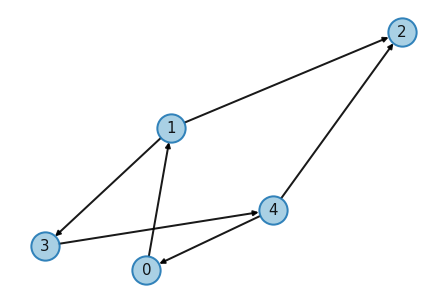

In [234]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0,1),(3,4),(4,2),(1,3),(4,0),(1,2)])
nx.draw(G, with_labels = True, **options)


La matrice d'adjacence du graphe ci-dessus est:

In [138]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 0 0 0]
 [0 0 1 1 0]
 [0 0 0 0 0]
 [0 0 0 0 1]
 [1 0 1 0 0]]


**Exemple 2**

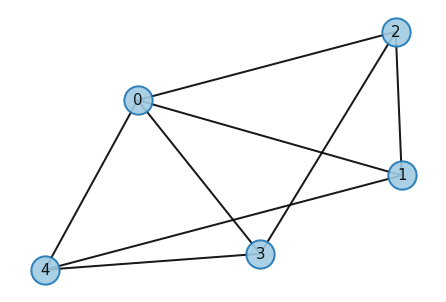

In [235]:
G = nx.wheel_graph(5)
nx.draw(G, with_labels=True, **options)

La matrice d'adjacence du graphe ci-dessus est:

In [143]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 1]
 [1 0 1 0 1]
 [1 1 0 1 0]
 [1 0 1 0 1]
 [1 1 0 1 0]]


**Exercice**

Déterminer la matrice d'adjacence du graphe ci-dessous.

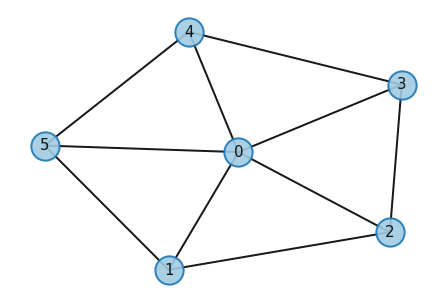

In [6]:
G = nx.wheel_graph(6)
nx.draw(G, with_labels=True, **options)

In [7]:
A = nx.adjacency_matrix(G)
print(A.todense())

[[0 1 1 1 1 1]
 [1 0 1 0 0 1]
 [1 1 0 1 0 0]
 [1 0 1 0 1 0]
 [1 0 0 1 0 1]
 [1 1 0 0 1 0]]


**Remarques** :
    
Dans le cas d'un **graphe simple non orienté**, la matrice d'adjacence est **symétrique selon la diagonale descendante** et celle ci ne comporte que des 0.   

<div class="alert alert-info">

Pour représenter un graphe de $n$ sommets il est nécessaire d'allouer $n^2$ emplacements.
Cette représentation est donc adaptée aux graphes **denses** (qui possèdent beaucoup d'arêtes).
</div>

#### Implémentation en Python

En Python il est possible de représenter une matrice par une liste de listes.

La librairie [numpy](https://www.programiz.com/python-programming/matrix) propose des tableaux optimisés pour le calcul de matrice.

**Opérations sur les matrices**

- Le test d'existence d'une arête est immédiat (il suffit d'accéder à la case correspondante de la matrice)
- Connaitre le degré d'un sommet nécessite de sommer toutes les cases d'une colonne (ou d'une ligne)
- le parours de l'ensemble des arcs nécessite de parcourir toute la matrice ce qui prendra un temps de l'ordre de $n^2$.

## Pages en relation

- [Algorithmes sur les graphes](../../6_Algorithmique/6.2_Algorithmes_sur_les_graphes/index.ipynb)

## Webographie

- [monlyceenumerique.fr](http://www.monlyceenumerique.fr/nsi_terminale/sd/sd5_graphe.php#3.1)
- [https://www.lyceum.fr/](https://www.lyceum.fr/tg/nsi/1-structures-de-donnees/5-graphes)
- [https://qkzk.xyz](https://qkzk.xyz/docs/nsi/cours_terminale/structures_donnees/graphes/)
- [https://info.blaisepascal.fr](https://info.blaisepascal.fr/nsi-graphes)
- http://math.univ-lyon1.fr/irem/Formation_ISN/formation_parcours_graphes/largeur/3_python1.html

<table style="width:100%">
    <tr>
        <td style="text-align:left;"><a href="../Arbre/arbre.ipynb"><< 4. Arbres et arbres binaires</a></td>
        <td style="text-align:right;"></td>
    </tr>
</table>

[Accueil](../../../index.ipynb) > [Sommaire de Terminale](../../index.ipynb)